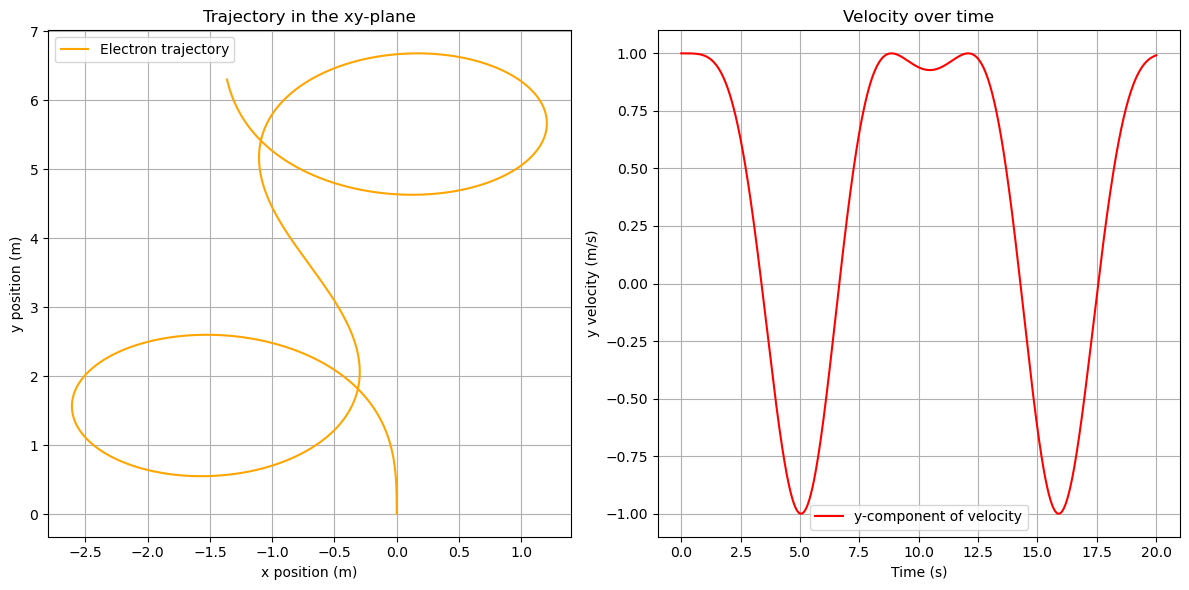

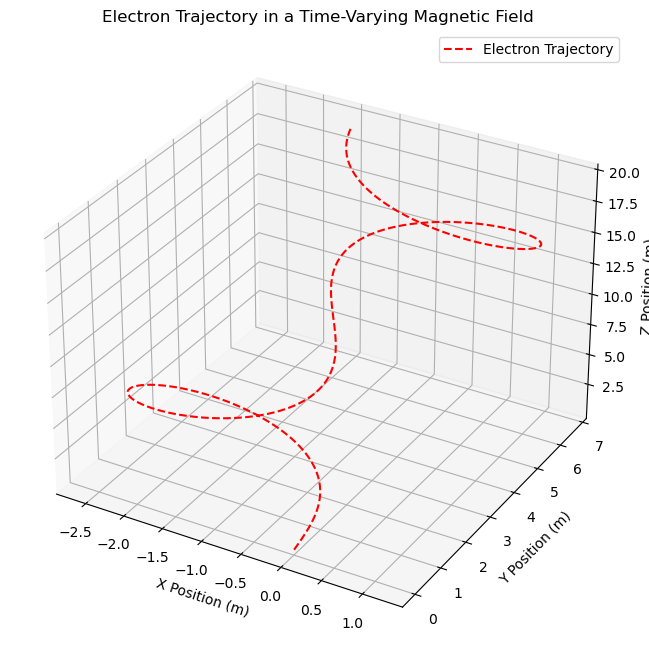

In [1]:
# CÓDIGO DE CHATGPT
import numpy as np
import matplotlib.pyplot as plt

# Define the physical constants and initial conditions
q = -1.6e-19  # Charge of an electron in Coulombs
m = 9.11e-31  # Mass of an electron in kg
B0 = 1.0      # Magnetic field amplitude in Tesla
omega = 0.3   # Angular frequency of the magnetic field
omega_0 = 1.0 # Cyclotron frequency for the electron

# Time parameters for the simulation
h = 0.01            # Time step size
t_max = 20          # Maximum time
t = np.arange(0, t_max + h, h)  # Array of time steps

# Initial conditions: position (r0) and velocity (v0)
r0 = np.array([0.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 1.0])

# System of differential equations for the electron in the magnetic field
def lorentz_force(v, t):
    vx, vy, vz = v
    dvxdt = -omega_0 * vy * np.sin(omega * t)
    dvydt = omega_0 * vx * np.sin(omega * t)
    dvzdt = 0
    return np.array([dvxdt, dvydt, dvzdt])

# Runge-Kutta 2nd order integrator
def runge_kutta_2nd_order(f, v0, t):
    v = np.zeros((len(t), len(v0)))
    v[0] = v0
    for i in range(1, len(t)):
        k1 = h * f(v[i-1], t[i-1])
        k2 = h * f(v[i-1] + 0.5 * k1, t[i-1] + 0.5 * h)
        v[i] = v[i-1] + k2
    return v

# Run the simulation
v = runge_kutta_2nd_order(lorentz_force, v0, t)

# Extract the position by integrating the velocity
r = np.cumsum(v * h, axis=0)

# Plot the trajectory in the xy-plane
plt.figure(figsize=(12, 6))

# Trajectory plot
plt.subplot(1, 2, 1)
plt.plot(r[:, 0], r[:, 1], label='Electron trajectory', color = 'orange')
plt.title('Trajectory in the xy-plane')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.legend()
plt.grid(True)

# Velocity plot
plt.subplot(1, 2, 2)
plt.plot(t, v[:, 1], label='y-component of velocity', color = 'red')
plt.title('Velocity over time')
plt.xlabel('Time (s)')
plt.ylabel('y velocity (m/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(r[:, 0], r[:, 1], r[:, 2], '--', label='Electron Trajectory', color = 'red')
ax.legend()
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
plt.title('Electron Trajectory in a Time-Varying Magnetic Field')
plt.show()

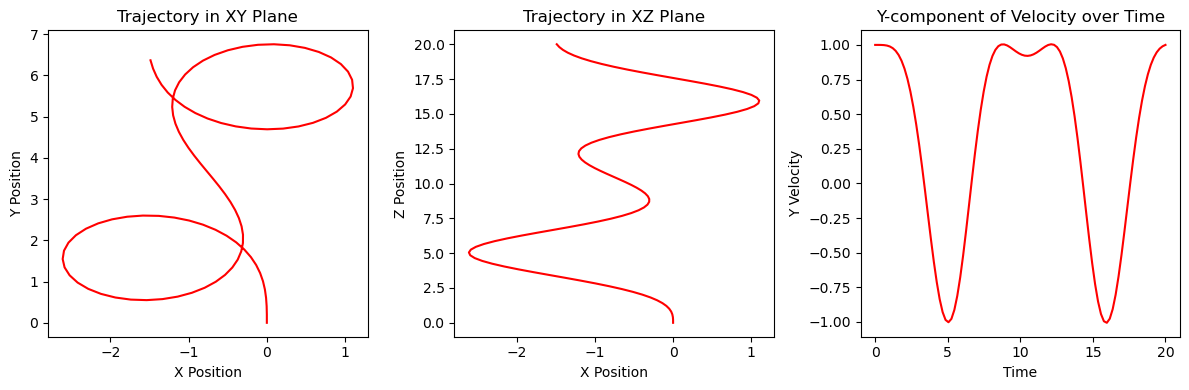

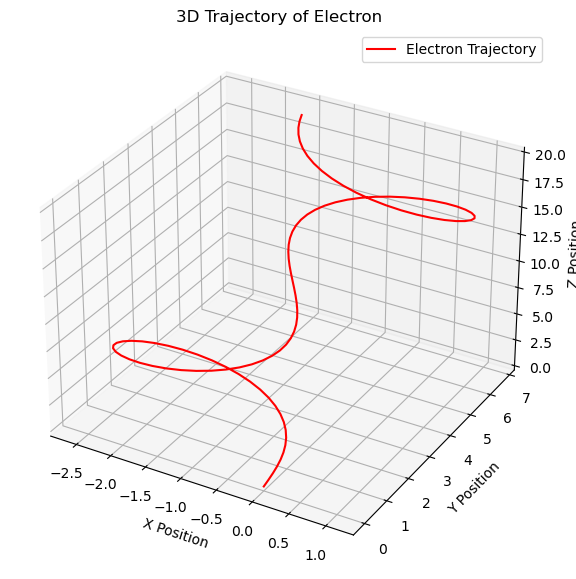

In [2]:
# CÓDIGO DE CHATGPT IMPLEMENTADO AL DE LA CLASE
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
omega_0 = 1.0  # Frecuencia ciclotrónica
omega = 0.3    # Frecuencia angular del campo magnético

def System(r, t, omega_0, omega):
    x, y, z, vx, vy, vz = r
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = -omega_0 * vy * np.sin(omega * t)
    dvydt = omega_0 * vx * np.sin(omega * t)
    dvzdt = 0
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

def Integrator2(f, r0, v0, t, omega_0, omega):
    h = t[1] - t[0]
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    z = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    vz = np.zeros_like(t)
    
    x[0], y[0], z[0] = r0
    vx[0], vy[0], vz[0] = v0
    
    for i in range(1, len(t)):
        R = np.array([x[i-1], y[i-1], z[i-1], vx[i-1], vy[i-1], vz[i-1]])
        K1 = f(R, t[i-1], omega_0, omega)
        R = np.array([x[i-1] + h*K1[0], y[i-1] + h*K1[1], z[i-1] + h*K1[2], vx[i-1] + h*K1[3], vy[i-1] + h*K1[4], vz[i-1] + h*K1[5]])
        K2 = f(R, t[i-1] + h, omega_0, omega)
        
        x[i] = x[i-1] + 0.5*h*(K1[0] + K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1] + K2[1])
        z[i] = z[i-1] + 0.5*h*(K1[2] + K2[2])
        vx[i] = vx[i-1] + 0.5*h*(K1[3] + K2[3])
        vy[i] = vy[i-1] + 0.5*h*(K1[4] + K2[4])
        vz[i] = vz[i-1] + 0.5*h*(K1[5] + K2[5])
    
    return x, y, z, vx, vy, vz

# Condiciones iniciales
r0 = (0., 0., 0.)  # Posición inicial
v0 = (0, 1, 1)     # Velocidad inicial

# Generar arreglo de tiempo con N=100 puntos entre 0 y 20 segundos
t = np.linspace(0, 20, num=100)

x, y, z, vx, vy, vz = Integrator2(System, r0, v0, t, omega_0, omega)

# Visualización
plt.figure(figsize=(12, 4))

# Trayectoria en el plano XY
plt.subplot(1, 3, 1)
plt.plot(x, y, color = 'red')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectory in XY Plane')

# Trayectoria en el plano XZ
plt.subplot(1, 3, 2)
plt.plot(x, z, color = 'red')
plt.xlabel('X Position')
plt.ylabel('Z Position')
plt.title('Trajectory in XZ Plane')

# Velocidad en Y a lo largo del tiempo
plt.subplot(1, 3, 3)
plt.plot(t, vy, color = 'red')
plt.xlabel('Time')
plt.ylabel('Y Velocity')
plt.title('Y-component of Velocity over Time')

plt.tight_layout()
plt.show()

# Crear figura para gráficos 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Configurar el subplot para 3D

# Graficar la trayectoria en 3D
ax.plot(x, y, z, label='Electron Trajectory', color = 'red')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('3D Trajectory of Electron')
ax.legend()

plt.show()